Kategori tinggi badan untuk 175 cm: 0.5


/opt/homebrew/Caskroom/miniforge/base/envs/datascience/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


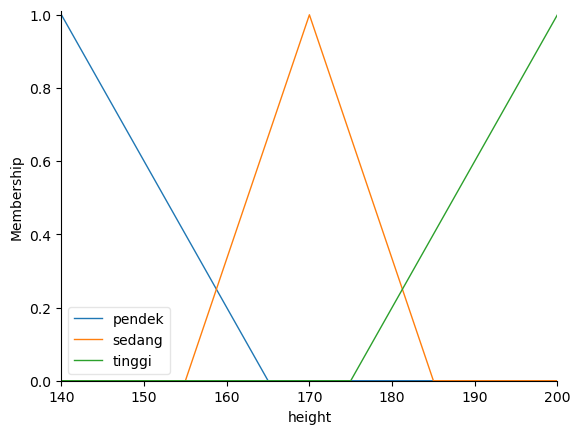

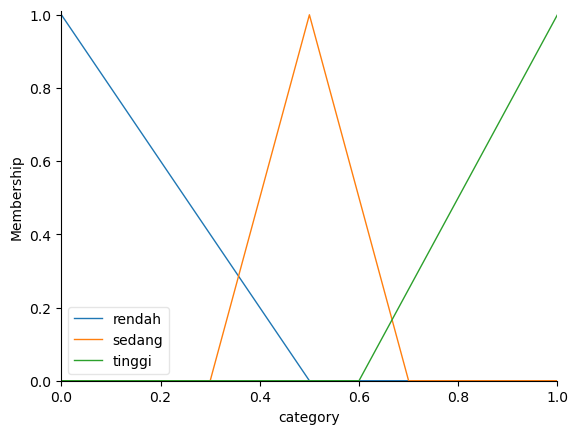

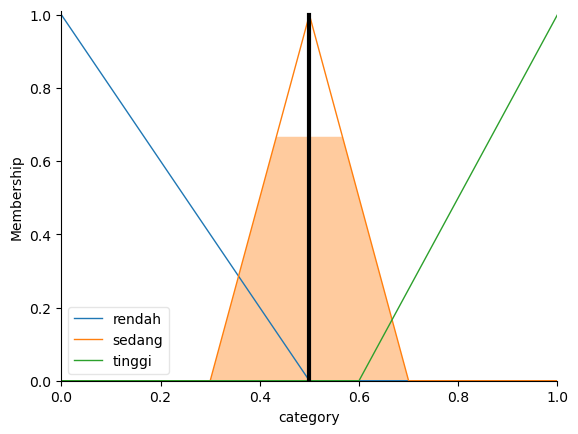

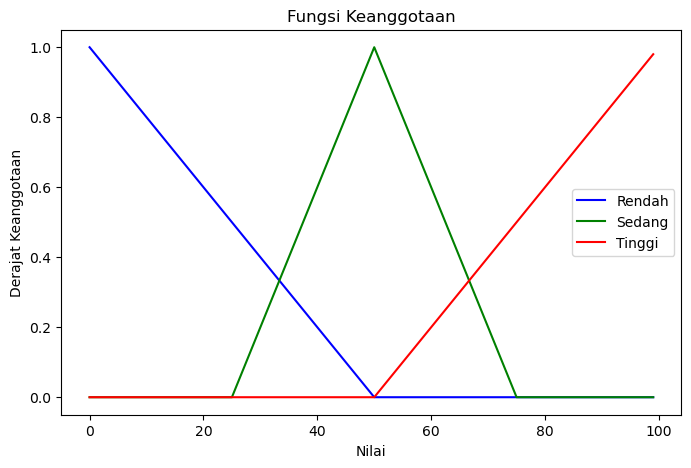

In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# 1. Visualisasi Fungsi Keanggotaan Fuzzy
def plot_membership():
    x = np.arange(0, 100, 1)
    low = fuzz.trimf(x, [0, 0, 50])
    medium = fuzz.trimf(x, [25, 50, 75])
    high = fuzz.trimf(x, [50, 100, 100])
    
    plt.figure(figsize=(8,5))
    plt.plot(x, low, 'b', label='Rendah')
    plt.plot(x, medium, 'g', label='Sedang')
    plt.plot(x, high, 'r', label='Tinggi')
    plt.title("Fungsi Keanggotaan")
    plt.xlabel("Nilai")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.show()

# 2. Contoh Sistem Fuzzy Sederhana: Menentukan Kategori Tinggi Badan
# Definisi variabel input dan output
height = ctrl.Antecedent(np.arange(140, 201, 1), 'height')
category = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'category')

# Definisi fungsi keanggotaan
height['pendek'] = fuzz.trimf(height.universe, [140, 140, 165])
height['sedang'] = fuzz.trimf(height.universe, [155, 170, 185])
height['tinggi'] = fuzz.trimf(height.universe, [175, 200, 200])

category['rendah'] = fuzz.trimf(category.universe, [0, 0, 0.5])
category['sedang'] = fuzz.trimf(category.universe, [0.3, 0.5, 0.7])
category['tinggi'] = fuzz.trimf(category.universe, [0.6, 1, 1])

# Menampilkan fungsi keanggotaan
height.view()
category.view()

# 3. Contoh Inferensi Fuzzy
rule1 = ctrl.Rule(height['pendek'], category['rendah'])
rule2 = ctrl.Rule(height['sedang'], category['sedang'])
rule3 = ctrl.Rule(height['tinggi'], category['tinggi'])

height_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
height_sim = ctrl.ControlSystemSimulation(height_ctrl)

# Contoh input tinggi badan 175 cm
height_sim.input['height'] = 175
height_sim.compute()
print(f"Kategori tinggi badan untuk 175 cm: {height_sim.output['category']}")

# Menampilkan hasil
category.view(sim=height_sim)

# Jalankan visualisasi
plot_membership()
